In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
from sklearn.model_selection import train_test_split
X = df_train.iloc[:,1:] #pour selectionner toutes les colones sauf la premiere 'label' qui sera la cible
y = df_train['label']

In [4]:
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42, stratify = y)

In [5]:
model = svm.SVC(C=42, kernel='rbf', degree=3, gamma=0.42, 
                coef0=0.0, shrinking=True, probability=False, 
                tol=0.001, cache_size=200, class_weight=None, 
                verbose=False, max_iter=-1, decision_function_shape='ovr', 
                break_ties=False, random_state=None)

In [ ]:
model.fit(X_train,y_train)

In [18]:
y_1505 = model.predict([X[1505]])

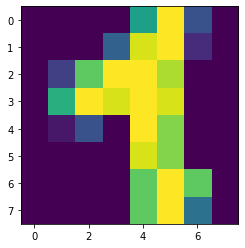

In [19]:
plt.imshow(df_train.images[1505])

In [20]:
y[1505]

1

In [21]:
y_1505

array([1])

In [22]:
model.score(X[1501:], y[1501:])

0.9324324324324325

In [23]:
from sklearn import metrics

In [25]:
y_pred=model.predict(X[1501:])
print(metrics.confusion_matrix(y_pred, y[1501:]))

[[26  0  0  0  0  0  0  0  0  0]
 [ 0 30  0  0  0  0  0  0  1  0]
 [ 0  0 27  0  0  0  0  0  0  0]
 [ 0  0  0 20  0  0  0  0  0  1]
 [ 1  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  2  0 30  0  0  0  1]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  2  0  0  0 29  0  1]
 [ 0  0  0  6  1  0  0  1 27  1]
 [ 0  0  0  0  2  0  0  0  0 27]]


In [27]:
#rapport de prédiction
print(metrics.classification_report(y_pred, y[1501:]))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.97      0.98        31
           2       1.00      1.00      1.00        27
           3       0.67      0.95      0.78        21
           4       0.91      0.97      0.94        31
           5       1.00      0.91      0.95        33
           6       1.00      1.00      1.00        30
           7       0.97      0.91      0.94        32
           8       0.96      0.75      0.84        36
           9       0.87      0.93      0.90        29

    accuracy                           0.93       296
   macro avg       0.93      0.94      0.93       296
weighted avg       0.94      0.93      0.93       296



In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline 
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [42]:
def plotSVC(title):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

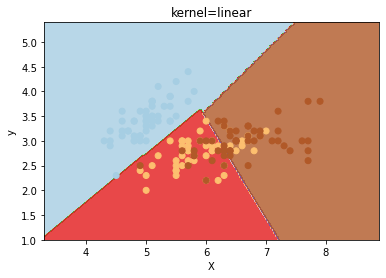

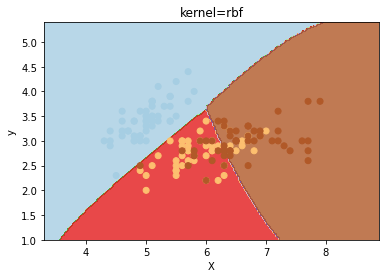

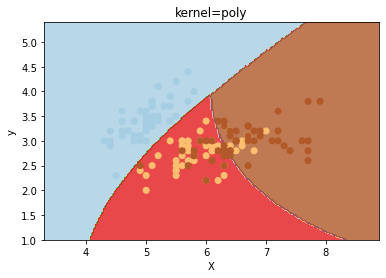

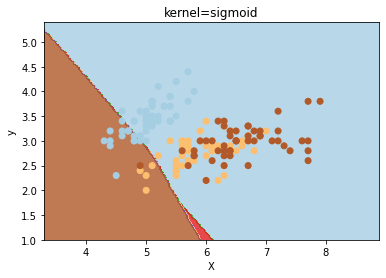

In [45]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    model = svm.SVC(kernel=kernel).fit(X, y)
    plotSVC('kernel=' + str(kernel))


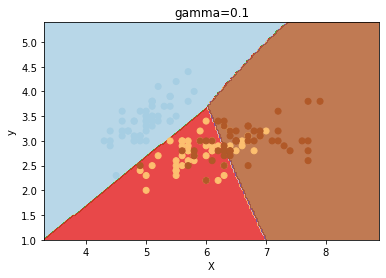

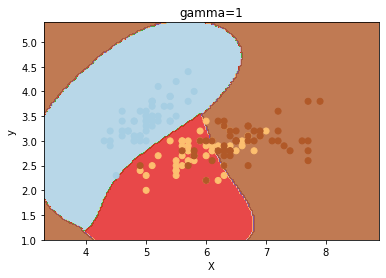

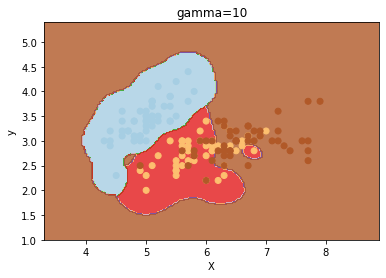

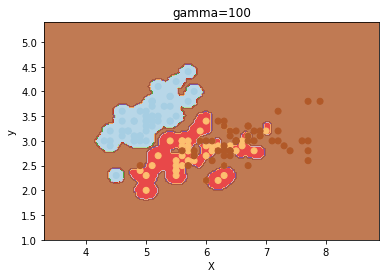

In [50]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    model = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
    plotSVC('gamma=' + str(gamma))


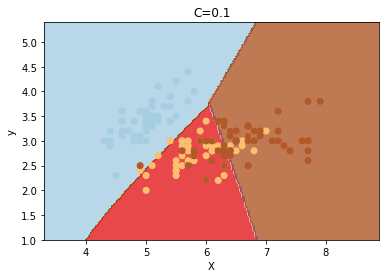

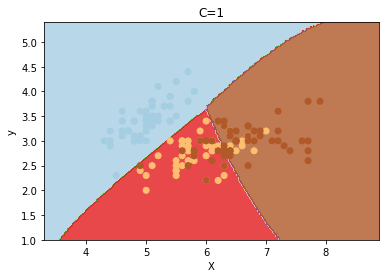

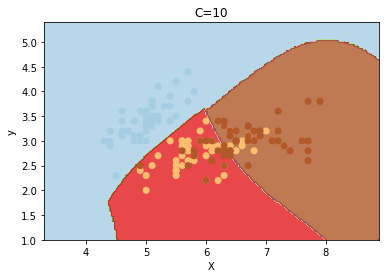

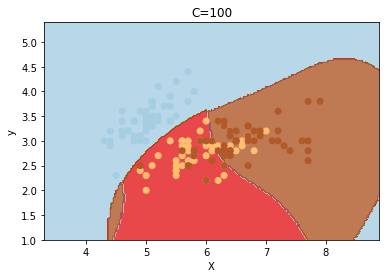

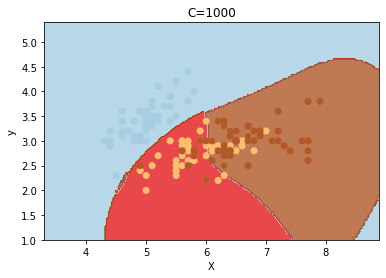

In [53]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
    model= svm.SVC(kernel='rbf', C=c).fit(X, y)
    plotSVC('C=' + str(c))
